#iAMC Gate Variable Analysis for Generated NML2#
The Vm recording from the neuroConstruct generated NeuroML2 version of the iAMC model Figure 10Hiiitop has slightly faster interburst intervals than the original generated Neuron version.
![generated Neuron](AOBMC1_genNeuron.png "generated Neuron")
generated Neuron
![generated NeuroML2](AOBMC1_genNML2.png "generated NeuroML2")
generated NeuroML2

To try to trace down the differences we here compare the gate variables as parsed within pyNeuroML with the equations:

#Test Results#
The majority of the ion channel models tested reproduced the equations and resultant steady state and time course curves as the origninal(below). 

However the Maex and De Schutter 1998 BK channel produced  slightly shifted steady state and time course curves for activation. The ninf variable is reproduced correctly while I don't understand what is happening with ntau as I calculate 0.005/q10 where q10 = 3^((35 - 17.350264793)/10) to be 7.19E-4 which is the value that NML2 has calculated, but plotting the equation is producing a value that looks to be 1000 times less.

Also the time course curves for the two Migliore channels transient sodium channels (Nax) are not quite matching the equations. I imagine that this is something to do with the if and else clauses. For the activation time course for the shunted version (NaxSH10) I have tried to put in the if and else statement to set the tau equations. But even though I have iterated through the array with a 'for' loop, I am still getting the error message for when it is expecting a boolean and gets an array.

#BK Calcium activated Potassium channel Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


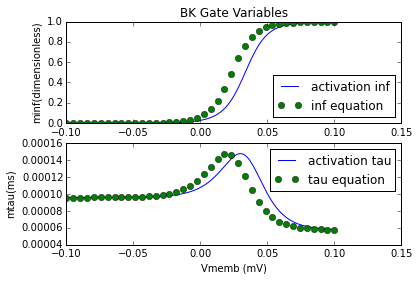

In [25]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('BK_IAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('BK_IAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = 3**((35 - 17.350264793)/10)
v = np.linspace(-0.100, 0.100, 40)
ca_conc = 5e-05#0.025
alpha = 2500/(1 + ( (1.5e-3 *(np.exp(-85*v))) / ca_conc))
beta = 1500/(1 + (ca_conc / (1.5e-4 * (np.exp (-77*v)))))
mtaueq=1/( (alpha + beta)*q10)
minf_fit = alpha/(alpha + beta)

#SI units so do not convert to physiological units
#vm[1] = vm[1]*1000
#mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('BK Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper left')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

Populating the interactive namespace from numpy and matplotlib


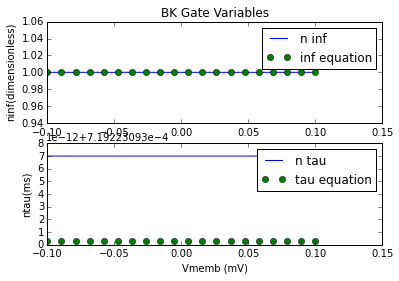

In [1]:
#load python packages
%pylab inline
import pandas as pd

#load data
ninf = pd.read_csv('BK_IAMC_ChannelML.n.inf.lems.35.dat', header=None, delim_whitespace=True)
ntau = pd.read_csv('BK_IAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = (3**((35 - 17.350264793)/10))
v = np.linspace(-0.100, 0.100, 20)
ntaue = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
ntaueq = ntaue/q10
ninf_fit = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

#SI units so don't convert to physiological units
#vm[1] = vm[1]*1000
#ntau[1] = ntau[1]*1000

#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], ninf[1], v, ninf_fit, 'o')
plt.ylabel('ninf(dimensionless)')
plt.title('BK Gate Variables')
#plt.legend(['n inf'], loc='upper right')
plt.legend(['n inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], ntau[1], v, ntaueq, 'o')
plt.ylabel('ntau(ms)')
plt.xlabel('Vmemb (mV)')
#plt.legend(['n tau'], loc='upper right')
plt.legend(['n tau', 'tau equation'], loc='upper right')

#Transient Sodium channel Naxsh0 Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


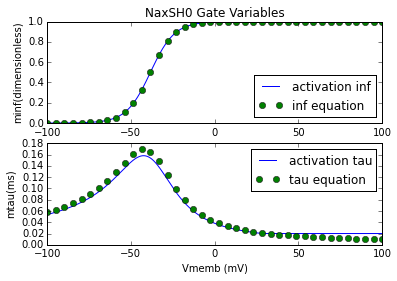

In [7]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaxSH0_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaxSH0_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH0_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -30
scale = 7.2
alpha = 2.880000018*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale)))
beta = 0.892800005*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale)))
tau = 1/(alpha + beta)
mtaueq = tau/q10
minf_fit = alpha/(alpha + beta)

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaxSH0 Gate Variables')
#plt.legend(['activation inf'], loc='lower right')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

##Inactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


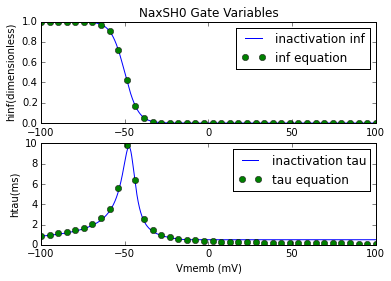

In [8]:
#load python packages
%pylab inline
import pandas as pd

#load data
hinf = pd.read_csv('NaxSH0_ChannelML.h.inf.lems.35.dat', header=None, delim_whitespace=True)
htau = pd.read_csv('NaxSH0_ChannelML.h.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH0_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -45
scale = 1.5
alpha = 0.045*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale)))
beta = 0.015*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale)))
tau = 1/(alpha + beta)
htaueq = tau/q10
hinf_fit = 1/(1 + np.exp(0.25*(v+50)))

#convert to physiological units
vm[1] = vm[1]*1000
htau[1] = htau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], hinf[1], v, hinf_fit, 'o')
plt.ylabel('hinf(dimensionless)')
plt.title('NaxSH0 Gate Variables')
#plt.legend(['inactivation inf'], loc='upper right')
plt.legend(['inactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], htau[1], v, htaueq, 'o')
plt.ylabel('htau(ms)')
plt.xlabel('Vmemb (mV)')
#plt.legend(['inactivation tau'], loc='upper right')
plt.legend(['inactivation tau', 'tau equation'], loc='upper right')

#Transient Sodium channel Naxsh10 Gate Variables#

##Activation Tau and Inf##

In [6]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaxSH10_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaxSH10_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH10_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -20
scale = 7.2
alpha = 2.880000018*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale)))
beta = 0.892800005*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale)))
testtau = (1/((alpha + beta)*q10))

for i, value in enumerate(v):
    if (testtau < 0.02):
        tau[i] =  (0.02*q10) 
    else:
        tau[i] =  1/(alpha + beta)  
    
mtaueq = tau/q10
minf_fit = alpha/(alpha + beta)

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaxSH10 Gate Variables')
#plt.legend(['activation inf'], loc='lower right')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

##Inactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


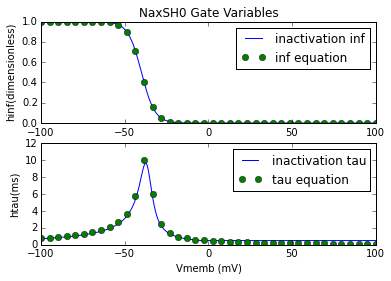

In [24]:
#load python packages
%pylab inline
import pandas as pd

#load data
hinf = pd.read_csv('NaxSH10_ChannelML.h.inf.lems.35.dat', header=None, delim_whitespace=True)
htau = pd.read_csv('NaxSH10_ChannelML.h.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH10_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -35
scale = 1.5
alpha = 0.045*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale)))
beta = 0.015*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale)))
htaueq = 1/( (alpha + beta)*q10)
hinf_fit = 1/(1 + np.exp(0.25*(v+40)))

#convert to physiological units
vm[1] = vm[1]*1000
htau[1] = htau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], hinf[1], v, hinf_fit, 'o')
plt.ylabel('hinf(dimensionless)')
plt.title('NaxSH0 Gate Variables')
#plt.legend(['inactivation inf'], loc='upper right')
plt.legend(['inactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], htau[1], v, htaueq, 'o')
plt.ylabel('htau(ms)')
plt.xlabel('Vmemb (mV)')
#plt.legend(['inactivation tau'], loc='upper right')
plt.legend(['inactivation tau', 'tau equation'], loc='upper right')

#Persistent Sodium channel Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


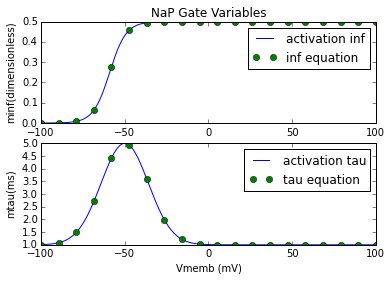

In [26]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaP_iAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaP_iAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaP_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
mtaueq = (1+(4 * (np.exp(0 - np.square((v + 50)/20)))))
vhalf = -59
scale = -4.9
minf_fit = 0.499622025796/(1+np.exp((v-vhalf)/scale))

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaP Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

##Inactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


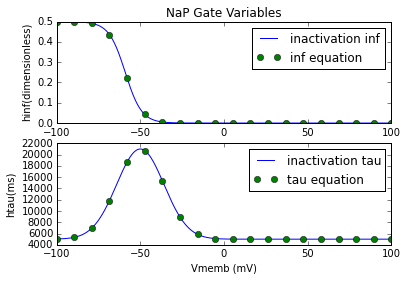

In [30]:
#load python packages
%pylab inline
import pandas as pd

#load data
hinf = pd.read_csv('NaP_iAMC_ChannelML.h.inf.lems.35.dat', header=None, delim_whitespace=True)
htau = pd.read_csv('NaP_iAMC_ChannelML.h.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaP_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
htaueq = (5000+(16000 * (np.exp(0 - np.square((v + 50)/20)))))
vhalf = -59
scale = 4.9
hinf_fit = 0.499622025796/(1+np.exp((v-vhalf)/scale))

#convert to physiological units
vm[1] = vm[1]*1000
htau[1] = htau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], hinf[1], v, hinf_fit, 'o')
plt.ylabel('hinf(dimensionless)')
plt.title('NaP Gate Variables')
plt.legend(['inactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], htau[1], v, htaueq, 'o')
plt.ylabel('htau(ms)')
plt.xlabel('Vmemb (mV)')
plt.legend(['inactivation tau', 'tau equation'], loc='upper right')

##Deactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


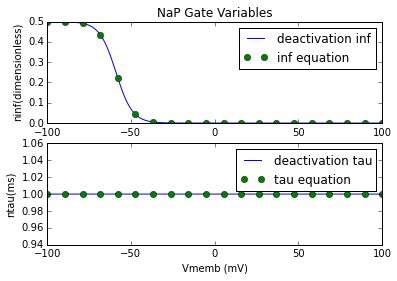

In [34]:
#load python packages
%pylab inline
import pandas as pd

#load data
ninf = pd.read_csv('NaP_iAMC_ChannelML.n.inf.lems.35.dat', header=None, delim_whitespace=True)
ntau = pd.read_csv('NaP_iAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaP_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
ntaueq = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
vhalf = -59
scale = 4.9
ninf_fit = 0.499622025796/(1+np.exp((v-vhalf)/scale))

#convert to physiological units
vm[1] = vm[1]*1000
ntau[1] = ntau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], ninf[1], v, ninf_fit, 'o')
plt.ylabel('ninf(dimensionless)')
plt.title('NaP Gate Variables')
plt.legend(['deactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], ntau[1], v, ntaueq, 'o')
plt.ylabel('ntau(ms)')
plt.xlabel('Vmemb (mV)')
plt.legend(['deactivation tau', 'tau equation'], loc='upper right')

#KDR channel Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


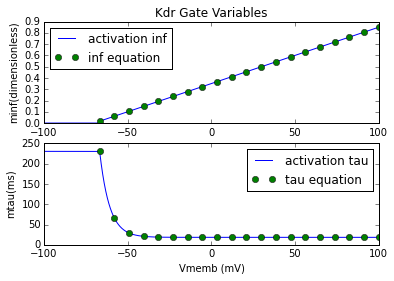

In [7]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('Kdr_iAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('Kdr_iAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('Kdr_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-66.67, 100, 20)
vhalf = 55
scale = 5.8842
mtaueq = 29.156*(np.exp(-(v+vhalf)/scale)) + 18.394
minf_fit = 0.005*v + 0.35

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('Kdr Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='upper left')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

##Deactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


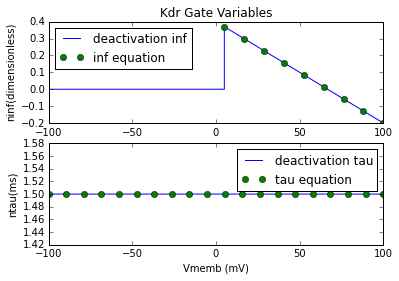

In [11]:
#load python packages
%pylab inline
import pandas as pd

#load data
ninf = pd.read_csv('Kdr_iAMC_ChannelML.n.inf.lems.35.dat', header=None, delim_whitespace=True)
ntau = pd.read_csv('Kdr_iAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('Kdr_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
ntaueq = [1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5]
v1 = np.linspace(5, 100, 9)
ninf_fit = ((-0.006*v1) + 0.40)

#convert to physiological units
vm[1] = vm[1]*1000
ntau[1] = ntau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], ninf[1], v1, ninf_fit, 'o')
plt.ylabel('ninf(dimensionless)')
plt.title('Kdr Gate Variables')
plt.legend(['deactivation inf', 'inf equation'], loc='upper left')
subplot(2,1,2)
plt.plot(vm[1], ntau[1], v, ntaueq, 'o')
plt.ylabel('ntau(ms)')
plt.xlabel('Vmemb (mV)')
plt.legend(['deactivation tau', 'tau equation'], loc='upper right')

#KA channel Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


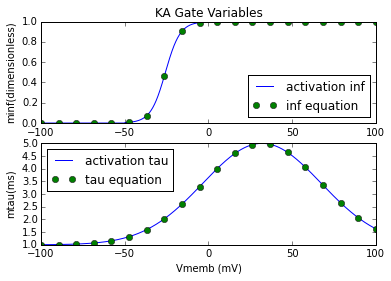

In [13]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('KA_iAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('KA_iAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('KA_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
mtaueq = (1 + (4 * (np.exp(0 - np.square((v - 32)/50)))))
minf_fit = 1 / (1 + np.exp(0 - (v + 25.7)/4.4))

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('KA Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper left')

##Inactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


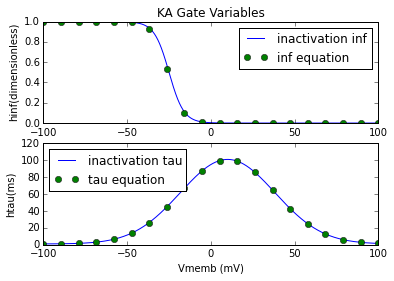

In [15]:
#load python packages
%pylab inline
import pandas as pd

#load data
hinf = pd.read_csv('KA_iAMC_ChannelML.h.inf.lems.35.dat', header=None, delim_whitespace=True)
htau = pd.read_csv('KA_iAMC_ChannelML.h.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('KA_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 20)
htaueq = (1 + (100 * (np.exp(0 - np.square((v - 10)/40)))))
hinf_fit = 1 / (1 + np.exp(0 - (v + 25.7)/-4.4))

#convert to physiological units
vm[1] = vm[1]*1000
htau[1] = htau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], hinf[1], v, hinf_fit, 'o')
plt.ylabel('hinf(dimensionless)')
plt.title('KA Gate Variables')
plt.legend(['inactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], htau[1], v, htaueq, 'o')
plt.ylabel('htau(ms)')
plt.xlabel('Vmemb (mV)')
plt.legend(['inactivation tau', 'tau equation'], loc='upper left')

#R-type Calcium channel Gate Variables#

##Activation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


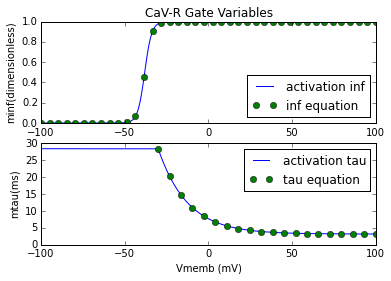

In [18]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('CaV_R_iAMC_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('CaV_R_iAMC_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('CaV_R_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
v1 = np.linspace(-30, 100, 20)
mtaueq = 3.1738 + (25.238 * (np.exp(-1 * ((v1+30)/17.498))))
minf_fit = 1 / (1 + np.exp(0 - (v + 38.037)/ 2.0914))

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('CaV-R Gate Variables')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v1, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

##Inactivation Tau and Inf##

Populating the interactive namespace from numpy and matplotlib


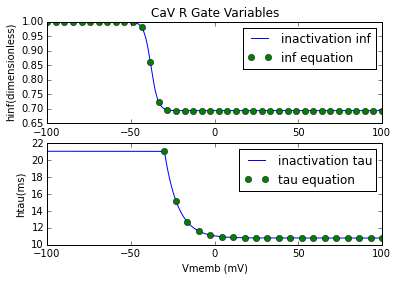

In [5]:
#load python packages
%pylab inline
import pandas as pd

#load data
hinf = pd.read_csv('CaV_R_iAMC_ChannelML.h.inf.lems.35.dat', header=None, delim_whitespace=True)
htau = pd.read_csv('CaV_R_iAMC_ChannelML.h.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('CaV_R_iAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
v1 = np.linspace(-30, 100, 20)
htaueq = 10.8 + (3.0 * (np.exp(-1 * ((v1+20)/8.13))))
hinf_fit = 1/(1+(np.exp(-1 * (v-(-38.037))/-2.0914))) + 0.6928/(1+(np.exp(-1 * (v-(-38.037))/2.0914)))

#convert to physiological units
vm[1] = vm[1]*1000
htau[1] = htau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], hinf[1], v, hinf_fit, 'o')
plt.ylabel('hinf(dimensionless)')
plt.title('CaV R Gate Variables')
plt.legend(['inactivation inf', 'inf equation'], loc='upper right')
subplot(2,1,2)
plt.plot(vm[1], htau[1], v1, htaueq, 'o')
plt.ylabel('htau(ms)')
plt.xlabel('Vmemb (mV)')
plt.legend(['inactivation tau', 'tau equation'], loc='upper right')